In [125]:
import os
import numpy as np
from matplotlib import pyplot as plt
import sys
import pandas as pd
import csv
from mpl_toolkits.mplot3d import Axes3D
#sys.path.insert(0, r'/Users/nenetto/Dev/BiiGTK/src/PythonTools')
%matplotlib inline

NameError: name 'numpy' is not defined

frame: Details frame of exported data in the following format:

1. Frame Index (integer) 
2. Time Stamp (double) in seconds
3. Trackable Count (integer) number of trackables tracked in current frame
4. ID
5. x
6. y
7. z
8. qx
9. qy
10. qz
11. qw
12. yaw
13. pitch
14. roll
15. Marker Count (integer) Count of all visibile markers in frame"
16. Marker Detail >for each reconstructed 3d marker< (x,y,z,id)

In [2]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

def getMatrixOptitrack(x, y, z, qx, qy, qz, qw):
    
    R = np.eye(4)
    R[0, 0] = -2 * qy*qy - 2 * qz*qz + 1
    R[0, 1] = 2 * qw*qz + 2 * qx*qy
    R[0, 2] = 2 * qw*qy - 2 * qx*qz
    R[0, 3] = x

    R[1, 0] = 2 * qx*qy - 2 * qw*qz
    R[1, 1] = -2 * qx*qx - 2 * qz*qz + 1
    R[1, 2] = -2 * qw*qx - 2 * qy*qz
    R[1, 3] = y

    R[2, 0] = -2 * qw*qy - 2 * qx*qz
    R[2, 1] = 2 * qw*qx - 2 * qy*qz
    R[2, 2] = -2 * qx*qx - 2 * qy*qy + 1
    R[2, 3] = z

    R[3, 0] = 0.0
    R[3, 1] = 0.0
    R[3, 2] = 0.0
    R[3, 3] = 1.0
    return R


def getDataFromCSVTrackingTools(myfilename):
    data = []
    with open(myfilename, 'rb') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            if row[0] == 'frame':
                data.append({
                            'time':float(row[2]),\
                            'id':float(row[4]),\
                            'x':float(row[5])*1000,\
                            'y':float(row[6])*1000,\
                            'z':float(row[7])*1000,\
                            'qx':float(row[8]),\
                            'qy':float(row[9]),\
                            'qz':float(row[10]),\
                            'qw':float(row[11])\
                    })

    df = pd.DataFrame(data)
    return df


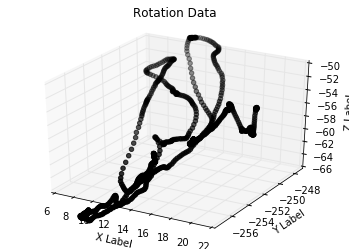

,id,qw,qx,qy,qz,time,x,y,z
0,1,0.626845,-0.165220,0.433516,-0.625964,0.026166,13.72269,-255.14588,-60.07137
1,1,0.626847,-0.165356,0.433433,-0.625984,0.036105,13.72883,-255.14627,-60.08019
2,1,0.626874,-0.165317,0.433353,-0.626023,0.046114,13.73521,-255.15610,-60.07954
3,1,0.626848,-0.165310,0.433378,-0.626033,0.056128,13.73911,-255.16105,-60.08875
4,1,0.626871,-0.165327,0.433320,-0.626046,0.066043,13.73487,-255.15881,-60.09486


In [3]:
df = getDataFromCSVTrackingTools(rotation_file)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.x, df.y, df.z, c='black', marker='o')

ax.axis('equal')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')

plt.show()
df.head(5)

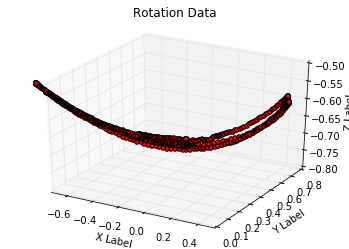

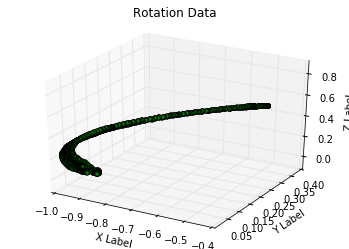

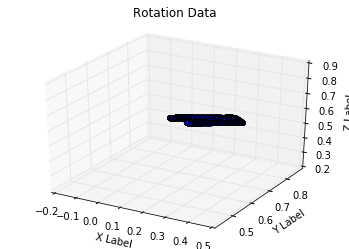

In [4]:
pointx = np.array([1, 0, 0, 1])
pointy = np.array([0, 1, 0, 1])
pointz = np.array([0, 0, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointx)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='r', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointy)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='g', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df.index)):
    R = getMatrixOptitrack(0,0,0,df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    pmov = np.dot(R,pointz)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Data\n')

plt.show() 

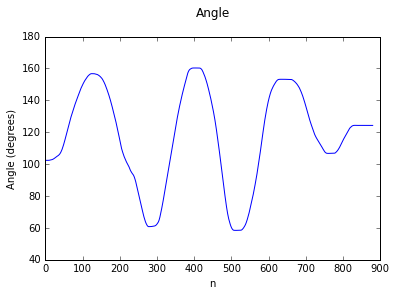

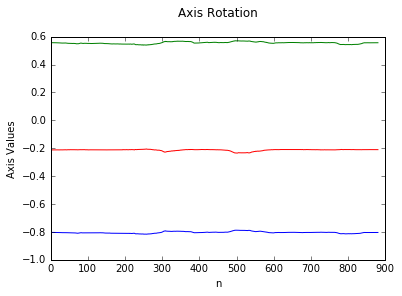

Axis Rotation Median  [-0.21114064  0.55572594 -0.80434458]
Axis Rotation Mean  [-0.21321643  0.55472439 -0.80417214]


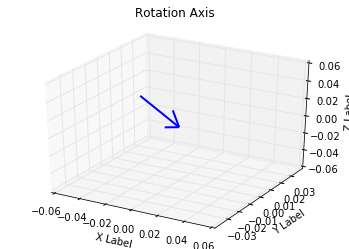

In [5]:

# Quaternion q = cos(a/2) + (ni+nj+nk)*sin (a/2)

# Get the angles

angles = 2 * np.arccos(df.qw.values)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.degrees(angles))
ax.set_xlabel('n')
ax.set_ylabel('Angle (degrees)')
ax.set_title('Angle\n')

plt.show() 


# Extract the axis of rotation

ix = df.qx.values / np.sin(angles/2)
iy = df.qy.values / np.sin(angles/2)
iz = df.qz.values / np.sin(angles/2)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ix,'r')
ax.plot(iy,'g')
ax.plot(iz,'b')
ax.set_xlabel('n')
ax.set_ylabel('Axis Values')
ax.set_title('Axis Rotation\n')

plt.show() 

# For this rotation we extract the mean axis of rotation as

AxisRotationMedian = np.array([np.median(ix),np.median(iy),np.median(iz)])
AxisRotationMean = np.array([np.mean(ix),np.mean(iy),np.mean(iz)])


print 'Axis Rotation Median ', AxisRotationMedian
print 'Axis Rotation Mean ', AxisRotationMean


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0,0,0, AxisRotationMedian[0], AxisRotationMedian[1], AxisRotationMedian[2], length=0.1, cmap='Reds', lw=2)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
ax.set_title('Rotation Axis\n')

plt.show() 


[ 0.19278872 -0.53700354  0.82125496]
[ 0.19278872 -0.53700354  0.82125496]
[-0.53250725 -0.46916846  0.70449768]
[-0.9157407   0.2578254   0.30813153]
[-0.9157407   0.2578254   0.30813153]
[-0.45155225 -0.56949911  0.68685612]
[-0.59177526  0.58275683  0.55695289]
[-0.59177526  0.58275683  0.55695289]
[-0.53295276 -0.3353775   0.77684187]


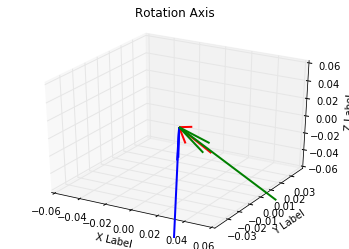

Axis Rotation  [ 0.21186248 -0.55636585  0.80347454]
Axis Flex Lat  [-0.89415211  0.20317761  0.39901237]
Axis Flex Ext  [-0.31605456  0.40978779  0.8556772 ]


In [143]:
# Complete Calibration Process and extraction of triedron of head


def getAxisRotation(dfData):
    ## Rotation Data
    pointX     = np.array([1, 0, 0, 1])
    pointY     = np.array([0, 1, 0, 1])
    pointZ     = np.array([0, 0, 1, 1])
    
    
    N = len(dfData.index)

    # Rotate x vector using rotation information 
    pointsX = np.zeros((N,3))
    pointsY = np.zeros((N,3))
    pointsZ = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,dfData['qx'].loc[i],dfData['qy'].loc[i],dfData['qz'].loc[i],dfData['qw'].loc[i])
        pointsX[i,:] = np.dot(R,pointX)[0:3]
        pointsY[i,:] = np.dot(R,pointY)[0:3]
        pointsZ[i,:] = np.dot(R,pointZ)[0:3]

    # Center the points
    pointsX = pointsX - np.tile(np.mean(pointsX, axis = 0), (N,1))
    pointsY = pointsY - np.tile(np.mean(pointsY, axis = 0), (N,1))
    pointsZ = pointsZ - np.tile(np.mean(pointsZ, axis = 0), (N,1))
    
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsX[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationX = np.array([x[0], x[1], 1.0])
    AxisRotationX = AxisRotationX/np.linalg.norm(AxisRotationX)
    
    A = np.concatenate((pointsX[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationY = np.array([x[0], x[1], 1.0])
    AxisRotationY = AxisRotationY/np.linalg.norm(AxisRotationY)
    
    
    A = np.concatenate((pointsZ[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsX[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotationZ = np.array([x[0], x[1], 1.0])
    AxisRotationZ = AxisRotationZ/np.linalg.norm(AxisRotationZ)
    
    print AxisRotationX
    print AxisRotationY
    print AxisRotationZ
    
    


def CalibrateHead(rotation_file, flex_lat_file, flex_ext_file, plotme = True):
    # Read three files
    rotDF = getDataFromCSVTrackingTools(rotation_file)
    flexLatDF = getDataFromCSVTrackingTools(flex_lat_file)
    flexExtDF = getDataFromCSVTrackingTools(flex_ext_file)
    
    
    
    getAxisRotation(rotDF)
    getAxisRotation(flexLatDF)
    getAxisRotation(flexExtDF)
    #######################
    # Axis for Rotation
    #######################
    
    ## Rotation Data
    pointRot     = np.array([0, 0, 1, 1])
    N = len(rotDF.index)

    # Rotate x vector using rotation information 
    pointsRot = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
        pointsRot[i,:] = np.dot(R,pointRot)[0:3]

    # Center the points
    pointsRot = pointsRot - np.tile(np.mean(pointsRot, axis = 0), (N,1))
    
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsRot[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsRot[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisRotation = np.array([x[0], x[1], 1.0])
    AxisRotation = AxisRotation/np.linalg.norm(AxisRotation)

    #######################
    # Axis for Flex Lateral
    #######################
    
    ## Rotation Data
    pointFlexLat = np.array([0, 1, 0, 1])
    N = len(flexLatDF.index)

    # Rotate x vector using rotation information 
    pointsFlexLat = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,flexLatDF['qx'].loc[i],flexLatDF['qy'].loc[i],flexLatDF['qz'].loc[i],flexLatDF['qw'].loc[i])
        pointsFlexLat[i,:] = np.dot(R,pointFlexLat)[0:3]

    # Center the points
    pointsFlexLat = pointsFlexLat - np.tile(np.mean(pointsFlexLat, axis = 0), (N,1))
        
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsFlexLat[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsFlexLat[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisFlexLat= np.array([x[0], x[1], 1.0])
    AxisFlexLat = AxisFlexLat/np.linalg.norm(AxisFlexLat)
    
    #######################
    # Axis for Flex Extensión
    #######################
    
    ## Rotation Data
    pointExt = np.array([0, 0, 1, 1])
    N = len(flexExtDF.index)
    
    # Rotate x vector using rotation information 
    pointsExt = np.zeros((N,3))

    for i in range(N):
        R = getMatrixOptitrack(0,0,0,flexExtDF['qx'].loc[i],flexExtDF['qy'].loc[i],flexExtDF['qz'].loc[i],flexExtDF['qw'].loc[i])
        pointsExt[i,:] = np.dot(R,pointExt)[0:3]

    # Center the points
    pointsExt = pointsExt - np.tile(np.mean(pointsExt, axis = 0),(N,1))
        
    # Fit points to a plane and get norm vector

    A = np.concatenate((pointsExt[:,0:2],np.ones((N,1))), axis = 1)
    b = pointsExt[:,2]

    x, residuals, rank, s = np.linalg.lstsq(A,b)
    AxisExt= np.array([x[0], x[1], 1.0])
    AxisExt = AxisExt/np.linalg.norm(AxisExt)
    
    
    
    
    
    if plotme == True:
                 
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.axis('equal')

        ax.quiver(0,0,0, AxisRotation[0], AxisRotation[1], AxisRotation[2], length=0.1, lw=2, color = 'r')
        ax.quiver(0,0,0, AxisFlexLat[0], AxisFlexLat[1], AxisFlexLat[2], length = 0.1, lw=2, color = 'g')
        ax.quiver(0,0,0, AxisExt[0], AxisExt[1], AxisExt[2], length = 0.1, lw=2, color = 'b')

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        
        ax.set_title('Rotation Axis\n')

        plt.show() 
        
        print 'Axis Rotation ', AxisRotation
        print 'Axis Flex Lat ', AxisFlexLat
        print 'Axis Flex Ext ', AxisExt
        
        return AxisRotation, AxisFlexLat, AxisExt
        
        
AxisRotation, AxisFlexLat, AxisExt = CalibrateHead(rotation_file, flex_lat_file, flex_ext_file)

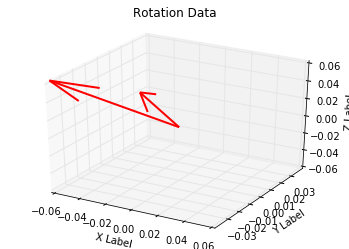

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

ax.quiver(0,0,0,0.19278872, -0.53700354,  0.82125496, length=0.1,color = 'r', lw=2, pivot='tail')
ax.quiver(0,0,0,-0.53250725, -0.46916846,  0.70449768, length=0.1,color = 'r', lw=2, pivot='tail')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.show() 

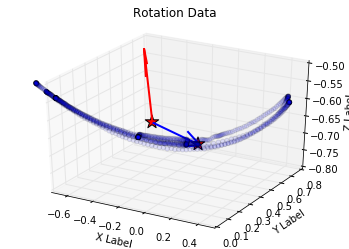

In [128]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
flex_lat_file = 'J:/Dev/AlgiaCervical/DataTest/flexion-lateral.csv'
flex_ext_file = 'J:/Dev/AlgiaCervical/DataTest/flexo-extension.csv'

RotDF = getDataFromCSVTrackingTools(rotation_file)

pointRot     = np.array([1, 0, 0, 1])


## Rotation Data
N = len(rotDF.index)

# Rotate x vector using rotation information 
pointsRot = np.zeros((N,3))

for i in range(N):
    R = getMatrixOptitrack(0,0,0,rotDF['qx'].loc[i],rotDF['qy'].loc[i],rotDF['qz'].loc[i],rotDF['qw'].loc[i])
    pmov = np.dot(R,pointRot)
    pointsRot[i,:] = np.dot(R,pointRot)[0:3]

    
meanPoint = np.mean(pointsRot, axis = 0)
    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')
ax.scatter(pointsRot[:,0],pointsRot[:,1],pointsRot[:,2], c='b', marker='o', alpha = 0.1)
ax.scatter(meanPoint[0],meanPoint[1],meanPoint[2], c='r', marker='*', s=200)
ax.scatter(pointsRot[0,0],pointsRot[0,1],pointsRot[0,2], c='r', marker='*', s=200)
ax.quiver(meanPoint[0],meanPoint[1],meanPoint[2],pointsRot[0,0]-meanPoint[0],pointsRot[0,1]-meanPoint[1],pointsRot[0,2]-meanPoint[2], length=0.3, cmap='Reds', lw=2, pivot='tail')
ax.quiver(meanPoint[0],meanPoint[1],meanPoint[2],AxisRotation[0]-meanPoint[0],AxisRotation[1]-meanPoint[1],AxisRotation[2]-meanPoint[2], length=0.3, color='r', lw=2, pivot='tail')


plt.axis('tight')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.axis('equal')
plt.show() 




## Extracting rotations for each movement

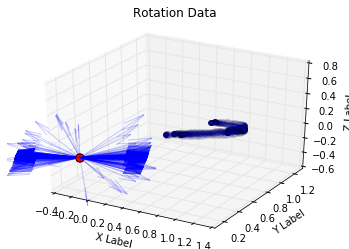

In [164]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
df = getDataFromCSVTrackingTools(rotation_file)

# Number of points
N = len(df.index)

point  = np.array([1, 1, 0, 1])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal')

for i in range(N-1):
    Ti = getMatrixOptitrack(0,0,0,df['qx'].loc[0],df['qy'].loc[0],df['qz'].loc[0],df['qw'].loc[0])
    Tii = getMatrixOptitrack(0,0,0,df['qx'].loc[i+1],df['qy'].loc[i+1],df['qz'].loc[i+1],df['qw'].loc[i+1])
    Ti_inv = np.linalg.inv(Ti)
    
    Gii = np.dot(Tii,Ti_inv)
    
    w, v = np.linalg.eig(Gii)
    RotationAxis = np.real(v[:,0])
    
    ax.quiver(0,0,0,RotationAxis[0],RotationAxis[1],RotationAxis[2], length=0.7, cmap='Reds', lw=1, pivot='tail', alpha = 0.2)

    pmov = np.dot(Gii,point)
    ax.scatter(pmov[0],pmov[1],pmov[2], c='b', marker='o', alpha = 0.1)
    plt.axis('tight')
    
ax.scatter(0,0,0, c='r', marker='o', alpha = 1.0, s=70)
plt.axis('tight')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('Rotation Data\n')
plt.axis('equal')
plt.show() 


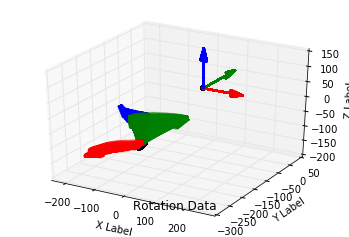

In [279]:
rotation_file = 'J:/Dev/AlgiaCervical/DataTest/rotacion.csv'
df = getDataFromCSVTrackingTools(rotation_file)

# Number of points
N = len(df.index)

# Draw axis

def drawAxis(axisMatrix,center):
       
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(center[0],center[1],center[2], c='b', marker='o', alpha = 1)
    
    sizeVectors = np.linalg.norm(center)/2.0
    
    axisMatrixRotated = axisMatrix #- np.tile(center[0:3],(3,1))
    
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[0,0],axisMatrixRotated[0,1],axisMatrixRotated[0,2], length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 1.0)
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[1,0],axisMatrixRotated[1,1],axisMatrixRotated[1,2], length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 1.0)
    ax.quiver(center[0],center[1],center[2],axisMatrixRotated[2,0],axisMatrixRotated[2,1],axisMatrixRotated[2,2], length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 1.0)
    
    ax.scatter(0,0,0, c='r', marker='o', alpha = 0.2)
    ax.quiver(0,0,0,1,0,0, length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(0,0,0,0,1,0, length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(0,0,0,0,0,1, length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.2)
    
    
    # Create cubic bounding box to simulate equal aspect ratio
    
    max_range = np.array([np.array([0,center[0]]).max()-np.array([0,center[0]]).min(),\
                          np.array([0,center[1]]).max()-np.array([0,center[1]]).min(),\
                          np.array([0,center[2]]).max()-np.array([0,center[2]]).min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(center[0])
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(center[1])
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(center[2])
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
    # Labelling
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Rotation Data\n')
    plt.axis('equal')
    plt.show() 

    
def getMatrixOptitrackFromDF(df,i):
    return getMatrixOptitrack(df['x'].loc[i],df['y'].loc[i],df['z'].loc[i],df['qx'].loc[i],df['qy'].loc[i],df['qz'].loc[i],df['qw'].loc[i])
    
    
def drawAxis2(axisMatrix,center):
       
    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    ax.scatter(center[0],center[1],center[2], c='b', marker='o', alpha = 1)
    
    sizeVectors = np.linalg.norm(center)/2.0
    
    axisMatrixRotated = axisMatrix #- np.tile(center[0:3],(3,1))
    
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[0,0],axisMatrixRotated[0,1],axisMatrixRotated[0,2],\
              length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[1,0],axisMatrixRotated[1,1],axisMatrixRotated[1,2],\
              length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.2)
    ax.quiver(center[0],center[1],center[2],\
              axisMatrixRotated[2,0],axisMatrixRotated[2,1],axisMatrixRotated[2,2],\
              length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.2)
    
    ax.scatter(0,0,0, c='r', marker='o', alpha = 0.2)
    ax.quiver(0,0,0,1,0,0, length=sizeVectors, color = 'r', lw=2, pivot='tail', alpha = 0.1)
    ax.quiver(0,0,0,0,1,0, length=sizeVectors, color = 'g', lw=2, pivot='tail', alpha = 0.1)
    ax.quiver(0,0,0,0,0,1, length=sizeVectors, color = 'b', lw=2, pivot='tail', alpha = 0.1)
    
    
    # Create cubic bounding box to simulate equal aspect ratio
    
    max_range = np.array([np.array([0,center[0]]).max()-np.array([0,center[0]]).min(),\
                          np.array([0,center[1]]).max()-np.array([0,center[1]]).min(),\
                          np.array([0,center[2]]).max()-np.array([0,center[2]]).min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(center[0])
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(center[1])
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(center[2])
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
       ax.plot([xb], [yb], [zb], 'w')
    
    # Labelling
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('Rotation Data')
    #plt.axis('equal')
    #plt.show()  
    
    
    
# Some test
    
'''  
axisOrigin = np.eye(3)
centerOrigin = np.array([0,0,0])

T0 = getMatrixOptitrackFromDF(df,0)
drawAxis(T0[0:3,0:3],T0[:,3])

T1 = getMatrixOptitrackFromDF(df,1)
drawAxis(T1[0:3,0:3],T1[:,3])

G1= np.dot(T1,np.linalg.inv(T0))
drawAxis(G1[0:3,0:3],G1[:,3])
'''

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in np.arange(0,N,1):
    T0 = getMatrixOptitrackFromDF(df,i)
    drawAxis2(T0[0:3,0:3],T0[:,3])

plt.axis('equal')
plt.show() 

